In [46]:
import numpy as np

# np.random.seed(2)
# a = softmax(z)
def softmax(z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_z = np.exp(z)
    A   = e_z/e_z.sum(axis =0)
    return A
def softmax_stable(z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.    
    """
    #C = max(z)
    e_z = np.exp(z- np.max(z, axis = 0, keepdims = True ))
    A = e_z/e_z.sum(axis = 0) # axis =0 
    return A

import numpy as np 

# randomly generate data 
N = 10 # number of training sample 
d = 5 # data dimension (tính luôn x0 =1)
C = 4 # number of classes 

X = np.random.randn(d, N)
print('X = ',X)
y = np.random.randint(0, 4,N)
print('y = ',y)
#one-hot coding
from scipy import sparse
def convert_labels(y, C = C): # one hot coding of class y => Y
    """
    convert 1d label to a matrix label: each column of this 
    matrix coresponding to 1 element in y. In i-th column of Y, 
    only one non-zeros element located in the y[i]-th position, 
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y),(y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y
Y = convert_labels(y, C)
print('Y:one hot coding',Y)

# cost or loss function  
def cost(X,Y,W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))
# gradient
def grad(X,Y, W):
    A = softmax(W.T.dot(X))
    return np.dot(X,((A-Y).T))

W_init = np.random.randn(d,C)
print('W_init',W_init)
# hàm kiểm tra đạo hàm
def numerical_grad(X,Y,W,cost):
    eps =1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i,j] +=eps
            W_n[i,j] -=eps
            g[i,j] = (cost(X,Y,W_p)- cost(X,Y,W_n))/(2*eps)
    return g
g1 = grad(X,Y,W_init)
g2 = numerical_grad(X,Y,W_init, cost)
print('sai số của đạo hàm bằng tay với xấp sỉ đạo hàm: ',np.linalg.norm(g1-g2))

X =  [[ 0.23552105 -0.7871293   0.31218808  0.85457857 -0.01428185  0.49522698
   0.33369279 -0.31726095  0.1159738   0.54472938]
 [-0.92720894 -0.30002309  0.53375866 -0.61712111  0.0827234   0.17707076
   0.4600514   0.20601513 -0.83801156  0.15558632]
 [-1.03088188 -2.02158516 -0.36300032 -0.91705819 -0.02927947 -1.00100121
   0.29634139  2.19516956  1.15807316  1.10714671]
 [ 0.64815798  0.3699437   0.28347522 -0.93133666  0.41927318  1.33830458
  -0.75993151  0.30558934 -0.89814925  1.91298653]
 [-0.74338469  0.36568769  1.07215589 -0.76298682  0.13225468 -0.11781049
  -0.95439538  0.91829822  0.12264995 -0.15024881]]
y =  [0 0 2 1 3 2 1 2 2 0]
Y:one hot coding [[1 1 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 1 0 0 0]
 [0 0 1 0 0 1 0 1 1 0]
 [0 0 0 0 1 0 0 0 0 0]]
W_init [[-0.99802683 -1.01798266 -0.35114942  0.76946591]
 [ 1.59932652  0.75312664  0.34060519 -0.34058002]
 [ 0.83868474  1.84082335  1.94514262  0.84494499]
 [ 0.5628004  -0.21181514 -0.25745644  0.58097895]
 [-1.93428589 -1.8968

# hàm chính cho train softmax regression

In [52]:
def softmax_regression(X,y, w_init, eta, tol =1e-4, max_counts =10000):
    w =[w_init] # để lưu history of weight
    check_w_after =20
    it =0
    counts =0
    C = W_init.shape[1] #classes classification
    N = X.shape[1]
    d = X.shape[0]
    Y = convert_labels(y,C) # labels haved one hot coding
    while counts < max_counts:
        #mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:,i].reshape(d,1)
            yi = Y[:,i].reshape(C,1)
            ai = softmax(w[-1].T.dot(xi))
            w_new = w[-1] - eta*xi.dot((ai - yi).T)
            counts +=1
            # stopping criteria
            if counts % check_w_after ==0:
                if (np.linalg.norm(w_new - w[-check_w_after]))< tol:
                    return w
            w.append(w_new)
    return w
eta =0.05
d = X.shape[0]
w_init = np.random.randn(d,C)

w =softmax_regression(X,y,w_init,eta)
print('weight: ',w[-1])

# Hàm dự đoán dữ liệu cho class mới
def pred_label(W,X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(np.dot(W.T,X))
    return np.argmax(A, axis =0)
print( 'predict labels cho diem du lieu: ', pred_label(w[-1],X))

weight:  [[-4.96518001  1.46098644  6.70593167 -1.01727454]
 [-3.95003506  2.25158146 -2.87996142  2.34178329]
 [ 0.28492997 -1.73477038 -0.86104004 -0.56880771]
 [ 2.71780541 -3.93908525 -0.27569101  0.17215751]
 [-4.09552823 -3.43437221  7.22287799  0.03095592]]
predict labels cho diem du lieu:  [0 0 2 1 2 2 1 2 2 0]


[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.67526196 1.67418231 1.30285837 ... 6.70476408 7.77154387 7.05830106]
 [2.93467678 1.8277259  1.22681119 ... 8.71696428 7.41345671 8.97190384]]
[0 0 0 ... 3 3 3]


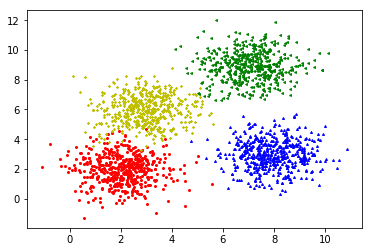

[[ 9.98190018 -2.85210799  1.97899165 -9.55586415]
 [-1.80547832  0.89978806 -2.22574475 -0.34125711]
 [-0.69274549 -0.76773144  1.85575912  2.05822291]]
predict labels cho diem du lieu:  [0 0 0 ... 3 3 3]


In [112]:
# simulated data
means =[[2,2],[8,3],[3,6],[7,9]]
cov   = [[1,0],[0,1]]
N =500
X0 = np.random.multivariate_normal(means[0],cov,N) # mỗi hàng là 1 điểm dữ liệu
X1 = np.random.multivariate_normal(means[1],cov,N)
X2 = np.random.multivariate_normal(means[2],cov,N)
X3 = np.random.multivariate_normal(means[3],cov,N)
# each column is a datapoint
X = np.concatenate((X0,X1,X2,X3),axis =0).T
# print(X)
# extended data
X = np.concatenate((np.ones((1,4*N)),X), axis =0)
print(X)
C =4
origin_labels = np.asarray([0]*N + [1]*N + [2]*N + [3]*N).T
print(origin_labels)
import matplotlib.pyplot as plt
plt.plot(X0[:,0],X0[:,1],'ro',markersize=2)
plt.plot(X1[:,0],X1[:,1],'b^',markersize=2)
plt.plot(X2[:,0],X2[:,1],'y*',markersize =2)
plt.plot(X3[:,0],X3[:,1],'g<',markersize =2)
plt.show()
# Thực hiện softmax regression
w_init = np.random.randn(X.shape[0],C)
W      = softmax_regression(X,origin_labels,w_init, 0.05)
print(W[-1])
print( 'predict labels cho diem du lieu: ', pred_label(W[-1],X))

In [113]:
# library softmax regression
from sklearn import linear_model
model = linear_model.LogisticRegression(C=1e5, multi_class ='multinomial', solver= 'lbfgs') # solver: giống gradient (SGD)
